In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anthro.viz
colors = anthro.viz.plotting_style()
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [2]:
#%% Load the population data 
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

In [3]:
# aquaculture data
data = pd.read_csv('../../../data/agriculture/FAO_fish_production_quantities/processed/FAO_FishStatJ_total_mass_source.csv')
merged = data.merge(total_pop, on='year')
merged.tail()

,source,year,produced mass (Mt),pop_bil
202,cultured,2017,79.545,7.550262
203,total,2017,172.661,7.550262
204,captured,2018,96.434,7.632819
205,cultured,2018,82.095,7.632819
206,total,2018,178.529,7.632819


In [4]:
decades = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
captured_decades = np.zeros(7)
cultured_decades = np.zeros(7)


for i in range(len(decades)-1):
    
    decade = decades[i]
    
    df_decade = merged[merged['year']>= decade]
    df_decade = df_decade[df_decade['year']< decades[i+1]]
    
    pop_decade = df_decade['pop_bil'].mean()
    captured_decade = df_decade[df_decade['source']=='captured']['produced mass (Mt)'].mean() / pop_decade
    cultured_decade = df_decade[df_decade['source']=='cultured']['produced mass (Mt)'].mean() / pop_decade
    
    captured_decades[i] = captured_decade
    cultured_decades[i] = cultured_decade

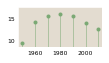

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [kg]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((np.min(captured_decades)*0.9, np.max(captured_decades)*1.1))

ax.plot(decades[0:-1], captured_decades, 'o', ms=3, color=colors['green'])
ax.vlines(decades[0:-1], 0, captured_decades, lw=0.5, color=colors['green'])

plt.savefig('../../../figures/database_paper/aqua_captured_decades.svg')

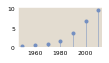

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [kg]', fontsize=6)
ax.set_xticks((1960, 1980, 2000))
#ax.set_yticks((0, 5, 10))
ax.set_ylim((0, np.max(cultured_decades)*1.1))

ax.plot(decades[0:-1], cultured_decades, 'o', ms=3, color=colors['blue'])
ax.vlines(decades[0:-1], 0, cultured_decades, lw=0.5, color=colors['blue'])

plt.savefig('../../../figures/database_paper/aqua_cultured_decades.svg')

In [6]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"